In [11]:
import data_processing 
import calculate_pet
import xarray as xr
# 从文件夹中读取nc数据
nc_files = data_processing.get_files_in_folder(r'H:\temp\git-test\git-test\Irrigation-Water-Demands\data\natural')

In [12]:
# 在时间轴上求取均值
result = {}
for nc_file in nc_files:
    var_name = os.path.basename(nc_file)[:4]
    var_mean = data_processing.squeeze_nc_time_axis(nc_file, var_name, lon = 'lon', lat = 'lat', time= 'time')  
    result[var_name] = var_mean

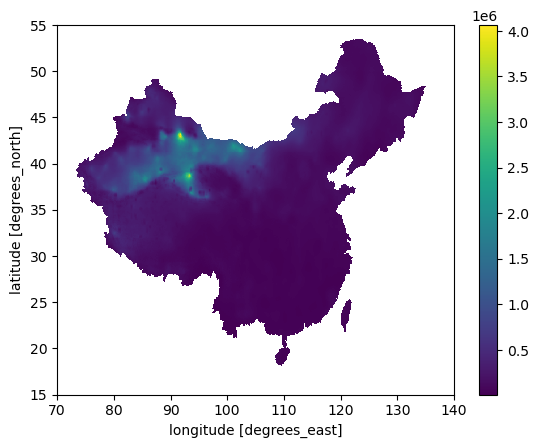

In [13]:
# 计算干旱指数
import calculate_pet
drought_index = calculate_pet.calculate_drought_index(result['temp'], result['shum'],result['pres'], result['srad'], result['lrad'], result['wind'], result['prec'])
drought_index.plot()